<div style="text-align:center;">
  <span style="color:#962323; font-size:45px; font-weight:bold; font-family:Arial;">PCA from scratch</span>
</div>

### <span style="color:#800080; font-style:italic; font-family:Arial;">General import</span>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA

# Load iris data
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

### <span style="color:#800080; font-style:italic; font-family:Arial;">Already coded</span>

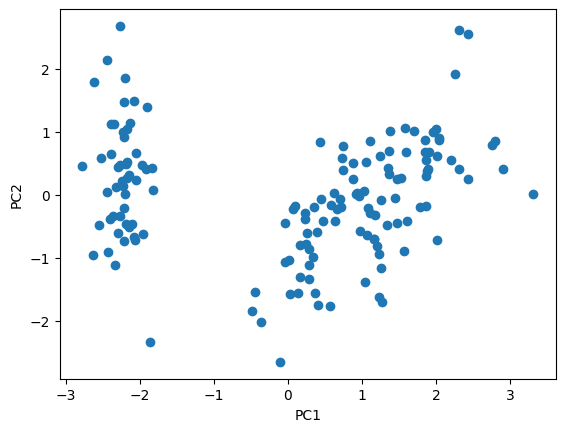

In [60]:
# Standardize data
df_iris = (df_iris - np.mean(df_iris)) / np.std(df_iris, axis=0)

# PCA
pca = PCA(n_components=2)
pca.fit(df_iris)
df_iris_pca = pca.transform(df_iris)
df_iris_pca = pd.DataFrame(df_iris_pca, columns=['PC1', 'PC2'])

# Plot PCA
plt.scatter(df_iris_pca['PC1'], df_iris_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


### <span style="color:#800080; font-style:italic; font-family:Arial;">From scratch</span>

##### <span style="color:#A8E4A0; font-style:italic; font-family:Arial;">Covariance matrix</span>

In [54]:
# From np
cov_matrix = np.cov(df_iris.T)

# From scratch
mean = np.mean(df_iris, axis=0)
centered = df_iris - mean
standardized = centered / np.std(centered, axis=0)
cov_matrix2 = np.dot(centered.T, centered) / (df_iris.shape[0] - 1)

print(cov_matrix, '\n\n', cov_matrix2)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]] 

 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


##### <span style="color:#A8E4A0; font-style:italic; font-family:Arial;">Eigen</span>

In [55]:
# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
for i in range(len(eigenvalues)):
    print(f'Vector {i + 1}: {eigenvectors[:, i]}  Value {i + 1}: {eigenvalues[i]}')

# Explained variance
explained_variance = eigenvalues / sum(eigenvalues)
print(f'Explained variance: {explained_variance * 100}')

Vector 1: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]  Value 1: 4.228241706034864
Vector 2: [-0.65658877 -0.73016143  0.17337266  0.07548102]  Value 2: 0.24267074792863386
Vector 3: [-0.58202985  0.59791083  0.07623608  0.54583143]  Value 3: 0.07820950004291899
Vector 4: [ 0.31548719 -0.3197231  -0.47983899  0.75365743]  Value 4: 0.023835092973450087
Explained variance: [92.46187232  5.30664831  1.71026098  0.52121839]


##### <span style="color:#A8E4A0; font-style:italic; font-family:Arial;">Feature vector</span>

In [56]:
# Feature vector
feature_vector = eigenvectors

##### <span style="color:#A8E4A0; font-style:italic; font-family:Arial;">Recast the data</span>

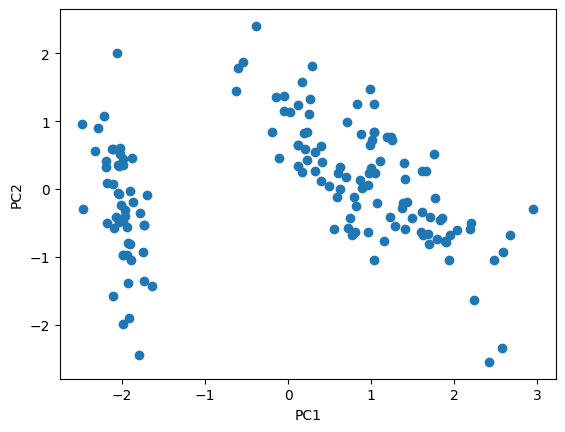

In [58]:
# Project data
projected_data = feature_vector.T.dot(standardized.T)

# Plot
plt.scatter(projected_data[0], projected_data[1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()